In [1]:
# CONFIGURATION

db = 'semparse_cdr_lite'
PARALLELISM = 1
MAX_DOCS = 1500
SPLITS = 3

# LFs
SOURCE = 'py'
INCLUDE = []

# Supervision
MODEL_DEP = True
MAJORITY_VOTE = False
TRADITIONAL = True
DISPLAY_CORRELATION = True
EMPIRICAL_FROM_TRAIN = False

# Discriminative
SEARCH_N = 10
N_EPOCHS = 5
LR = 0.01
L1_PENALTY = 0.0
L2_PENALTY = 0.0
PRINT_FREQ = 5

In [2]:
import os

# os.environ['SNORKELDB'] = 'postgres://localhost:5432/' + db

from snorkel import SnorkelSession
session = SnorkelSession()

In [3]:
from snorkel.models import candidate_subclass
ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

In [4]:
from snorkel.semantic import CDRModel
sm = CDRModel(session,\
              candidate_class=ChemicalDisease,\
              traditional=TRADITIONAL,\
              splits=SPLITS,\
              parallelism=PARALLELISM)

In [4]:
%time sm.parse(max_docs=MAX_DOCS)

Clearing existing...
Running UDF...
[========================================] 100%
Documents: 1500
Sentences: 14001
CPU times: user 1min 30s, sys: 2.79 s, total: 1min 33s
Wall time: 4min 19s


In [5]:
%time sm.extract()

Clearing existing...
Running UDF...
[========================================] 100%
Candidates [Split 0]: 8272
Clearing existing...
Running UDF...
[========================================] 100%
Candidates [Split 1]: 888
Clearing existing...
Running UDF...
[========================================] 100%
Candidates [Split 2]: 4620
CPU times: user 31.8 s, sys: 454 ms, total: 32.2 s
Wall time: 32.1 s


In [7]:
%time sm.label()

Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 0: (8272,34) sparse (nnz = 25549)
LF Summary Statistics: 34 LFs applied to 8272 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		95.10%
Overlap (candidates w/ > 1 labels):		79.53%
Conflict (candidates w/ conflicting labels):	55.33%
Redundancy (labels per candidate (avg)):	3.1
Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 1: (888,34) sparse (nnz = 2717)
LF Summary Statistics: 34 LFs applied to 888 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		91.67%
Overlap (candidates w/ > 1 labels):		78.15%
Conflict (candidates w/ conflicting labels):	53.83%
Redundancy (labels per candidate (avg)):	3.1
Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 2: (4620,34) sparse (nnz = 140

In [12]:
%time sm.generate_lfs(source=SOURCE, include=INCLUDE)

CPU times: user 14 µs, sys: 4 µs, total: 18 µs
Wall time: 16.9 µs


In [5]:
%time sm.load_gold()

Split 0:
AnnotatorLabels created: 8272
Split 1:
AnnotatorLabels created: 0
Split 2:
AnnotatorLabels created: 4620
CPU times: user 2min 38s, sys: 1.85 s, total: 2min 40s
Wall time: 2min 40s


Saved 8272 training marginals


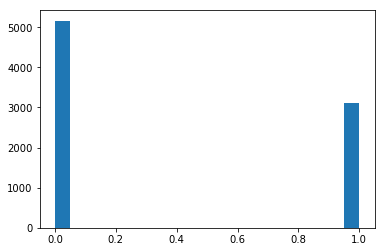

CPU times: user 5.02 s, sys: 122 ms, total: 5.15 s
Wall time: 5.15 s


In [4]:
%time sm.supervise(model_dep=MODEL_DEP,\
                    majority_vote=MAJORITY_VOTE,\
                    display_correlation=DISPLAY_CORRELATION,\
                    empirical_from_train=EMPIRICAL_FROM_TRAIN)

In [17]:
%time sm.featurize()

Clearing existing...
Running UDF...
[========================================] 100%

Featurized split 0: (8272,122840) sparse (nnz = 448906)
Clearing existing...
Running UDF...
[========================================] 100%

Featurized split 1: (888,122840) sparse (nnz = 27734)
Clearing existing...
Running UDF...
[========================================] 100%

Featurized split 2: (4620,122840) sparse (nnz = 138487)
CPU times: user 12min 34s, sys: 3.53 s, total: 12min 37s
Wall time: 12min 39s


Using 100 hard-labeled examples for supervision

Initialized RandomSearch search of size 10. Search space size = 216.

Random Search:
[0] Testing lr = 1.00e-03, l1_penalty = 1.00e-06, l2_penalty = 1.00e-05
[SparseLR] lr=0.001 l1=1e-06 l2=1e-05
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.13s)	Avg. loss=0.680926	NNZ=122840
[SparseLR] Epoch 4 (0.24s)	Avg. loss=0.598846	NNZ=122840
[SparseLR] Training done (0.24s)
TEST MARGINALS:


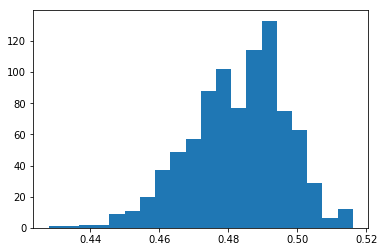

P: 0.476, R: 0.132, F1: 0.206
[SparseLR] Model saved. To load, use name
		SparseLR_0
[1] Testing lr = 1.00e-05, l1_penalty = 1.00e-05, l2_penalty = 1.00e-01
[SparseLR] lr=1e-05 l1=1e-05 l2=0.1
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.16s)	Avg. loss=0.678154	NNZ=122840
[SparseLR] Epoch 4 (0.26s)	Avg. loss=0.677223	NNZ=122840
[SparseLR] Training done (0.26s)
TEST MARGINALS:


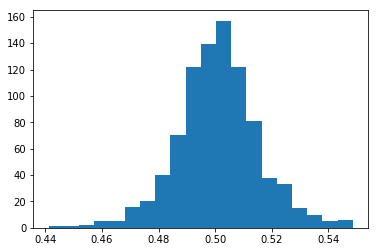

P: 0.340, R: 0.551, F1: 0.421
[SparseLR] Model saved. To load, use name
		SparseLR_1
[2] Testing lr = 1.00e-03, l1_penalty = 1.00e-05, l2_penalty = 1.00e-06
[SparseLR] lr=0.001 l1=1e-05 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.15s)	Avg. loss=0.698646	NNZ=122840
[SparseLR] Epoch 4 (0.25s)	Avg. loss=0.614201	NNZ=122840
[SparseLR] Training done (0.25s)
TEST MARGINALS:


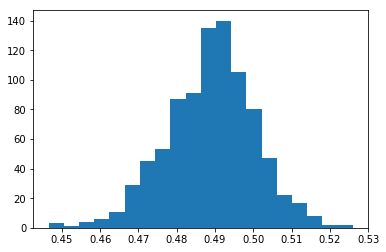

P: 0.449, R: 0.206, F1: 0.282
[3] Testing lr = 1.00e-05, l1_penalty = 1.00e-03, l2_penalty = 1.00e-01
[SparseLR] lr=1e-05 l1=0.001 l2=0.1
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.16s)	Avg. loss=0.711902	NNZ=122840
[SparseLR] Epoch 4 (0.26s)	Avg. loss=0.710890	NNZ=122840
[SparseLR] Training done (0.26s)
TEST MARGINALS:


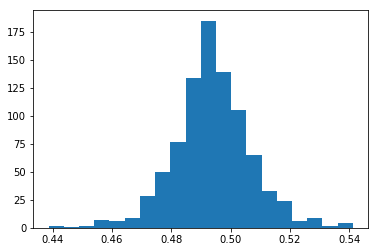

P: 0.355, R: 0.301, F1: 0.325
[4] Testing lr = 1.00e-04, l1_penalty = 1.00e-05, l2_penalty = 1.00e-04
[SparseLR] lr=0.0001 l1=1e-05 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.17s)	Avg. loss=0.679296	NNZ=122840
[SparseLR] Epoch 4 (0.26s)	Avg. loss=0.670317	NNZ=122840
[SparseLR] Training done (0.26s)
TEST MARGINALS:


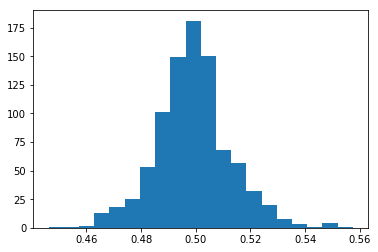

P: 0.342, R: 0.463, F1: 0.393
[5] Testing lr = 1.00e-01, l1_penalty = 1.00e-06, l2_penalty = 1.00e-01
[SparseLR] lr=0.1 l1=1e-06 l2=0.1
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.17s)	Avg. loss=0.689580	NNZ=122840
[SparseLR] Epoch 4 (0.27s)	Avg. loss=0.440059	NNZ=122840
[SparseLR] Training done (0.27s)
TEST MARGINALS:


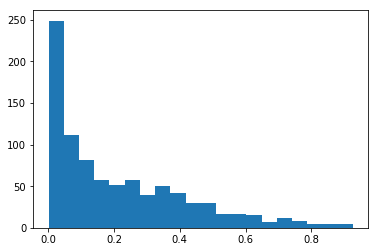

P: 0.592, R: 0.196, F1: 0.294
[6] Testing lr = 1.00e-04, l1_penalty = 1.00e-02, l2_penalty = 1.00e-04
[SparseLR] lr=0.0001 l1=0.01 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.18s)	Avg. loss=0.780824	NNZ=122840
[SparseLR] Epoch 4 (0.28s)	Avg. loss=0.767054	NNZ=122840
[SparseLR] Training done (0.28s)
TEST MARGINALS:


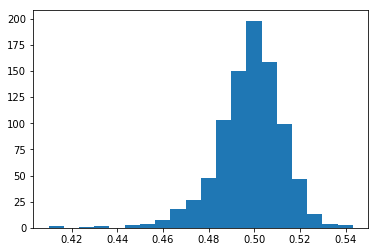

P: 0.341, R: 0.473, F1: 0.397
[7] Testing lr = 1.00e-06, l1_penalty = 1.00e-01, l2_penalty = 1.00e-04
[SparseLR] lr=1e-06 l1=0.1 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.19s)	Avg. loss=1.662368	NNZ=122840
[SparseLR] Epoch 4 (0.28s)	Avg. loss=1.661797	NNZ=122840
[SparseLR] Training done (0.28s)
TEST MARGINALS:


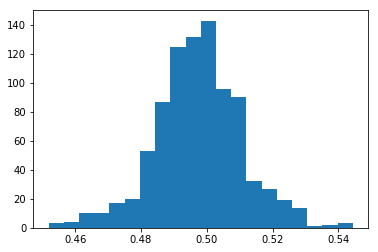

P: 0.335, R: 0.426, F1: 0.375
[8] Testing lr = 1.00e-04, l1_penalty = 1.00e-05, l2_penalty = 1.00e-01
[SparseLR] lr=0.0001 l1=1e-05 l2=0.1
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.19s)	Avg. loss=0.694201	NNZ=122840
[SparseLR] Epoch 4 (0.29s)	Avg. loss=0.684871	NNZ=122840
[SparseLR] Training done (0.29s)
TEST MARGINALS:


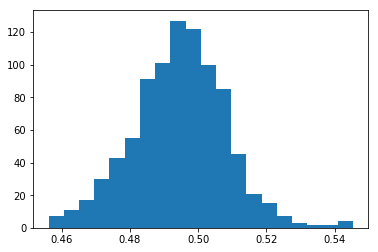

P: 0.359, R: 0.368, F1: 0.363
[9] Testing lr = 1.00e-02, l1_penalty = 1.00e-06, l2_penalty = 1.00e-04
[SparseLR] lr=0.01 l1=1e-06 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=100  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.46s)	Avg. loss=0.690494	NNZ=122840
[SparseLR] Epoch 4 (0.55s)	Avg. loss=0.276066	NNZ=122840
[SparseLR] Training done (0.55s)
TEST MARGINALS:


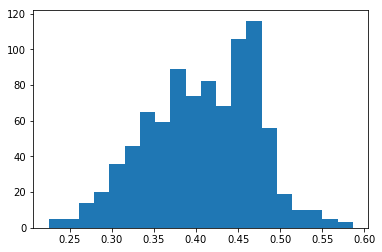

P: 0.683, R: 0.095, F1: 0.166
[SparseLR] Loaded model <SparseLR_1>
         lr  l1_penalty  l2_penalty     Prec.      Rec.        F1
1  0.000010    0.000010    0.100000  0.340292  0.550676  0.420645
6  0.000100    0.010000    0.000100  0.341463  0.472973  0.396601
4  0.000100    0.000010    0.000100  0.341646  0.462838  0.393113
7  0.000001    0.100000    0.000100  0.335106  0.425676  0.375000
8  0.000100    0.000010    0.100000  0.358553  0.368243  0.363333
3  0.000010    0.001000    0.100000  0.354582  0.300676  0.325411
5  0.100000    0.000001    0.100000  0.591837  0.195946  0.294416
2  0.001000    0.000010    0.000001  0.448529  0.206081  0.282407
0  0.001000    0.000001    0.000010  0.475610  0.131757  0.206349
9  0.010000    0.000001    0.000100  0.682927  0.094595  0.166172

Dev:
TEST MARGINALS:


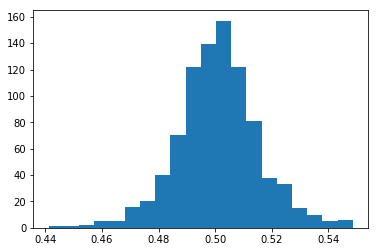

Scores (Un-adjusted)
Pos. class accuracy: 0.551
Neg. class accuracy: 0.466
Precision            0.34
Recall               0.551
F1                   0.421
----------------------------------------
TP: 163 | FP: 316 | TN: 276 | FN: 133


Calibration plot:


/Users/bradenjh/anaconda/envs/snorkel/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bradenjh/anaconda/envs/snorkel/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


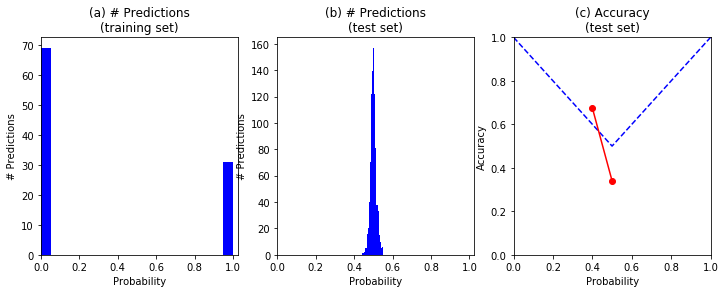


Test:
TEST MARGINALS:


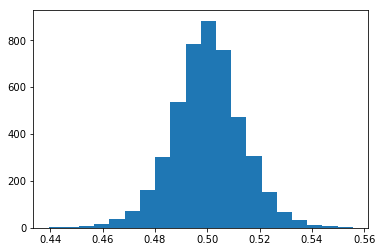

Scores (Un-adjusted)
Pos. class accuracy: 0.532
Neg. class accuracy: 0.517
Precision            0.348
Recall               0.532
F1                   0.421
----------------------------------------
TP: 801 | FP: 1503 | TN: 1612 | FN: 704


Calibration plot:


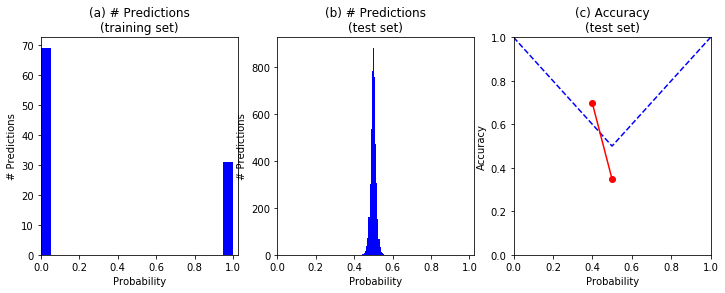

Using 1600 hard-labeled examples for supervision

Initialized RandomSearch search of size 10. Search space size = 216.

Random Search:
[0] Testing lr = 1.00e-06, l1_penalty = 1.00e-04, l2_penalty = 1.00e-05
[SparseLR] lr=1e-06 l1=0.0001 l2=1e-05
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (1.70s)	Avg. loss=0.697760	NNZ=122840
[SparseLR] Epoch 4 (3.38s)	Avg. loss=0.697224	NNZ=122840
[SparseLR] Training done (3.38s)
TEST MARGINALS:


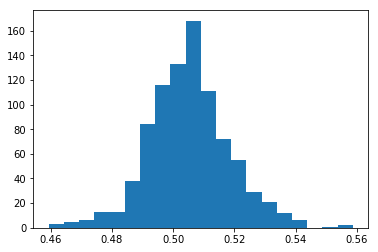

P: 0.334, R: 0.662, F1: 0.444
[SparseLR] Model saved. To load, use name
		SparseLR_0
[1] Testing lr = 1.00e-06, l1_penalty = 1.00e-05, l2_penalty = 1.00e-05
[SparseLR] lr=1e-06 l1=1e-05 l2=1e-05
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.66s)	Avg. loss=0.695335	NNZ=122840
[SparseLR] Epoch 4 (2.35s)	Avg. loss=0.694815	NNZ=122840
[SparseLR] Training done (2.35s)
TEST MARGINALS:


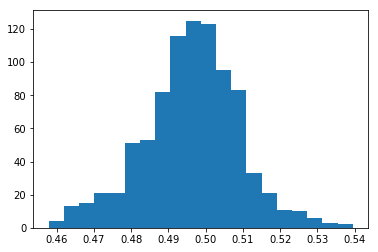

P: 0.311, R: 0.368, F1: 0.337
[2] Testing lr = 1.00e-03, l1_penalty = 1.00e-04, l2_penalty = 1.00e-06
[SparseLR] lr=0.001 l1=0.0001 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.67s)	Avg. loss=0.660499	NNZ=122840
[SparseLR] Epoch 4 (2.34s)	Avg. loss=0.433737	NNZ=122840
[SparseLR] Training done (2.34s)
TEST MARGINALS:


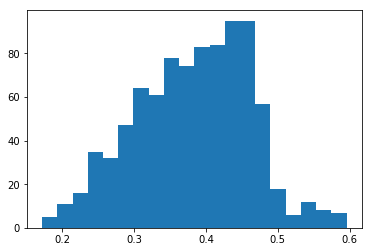

P: 0.674, R: 0.098, F1: 0.171
[3] Testing lr = 1.00e-06, l1_penalty = 1.00e-06, l2_penalty = 1.00e-06
[SparseLR] lr=1e-06 l1=1e-06 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.66s)	Avg. loss=0.696553	NNZ=122840
[SparseLR] Epoch 4 (2.26s)	Avg. loss=0.696023	NNZ=122840
[SparseLR] Training done (2.26s)
TEST MARGINALS:


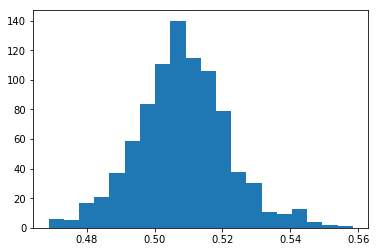

P: 0.342, R: 0.764, F1: 0.473
[SparseLR] Model saved. To load, use name
		SparseLR_3
[4] Testing lr = 1.00e-02, l1_penalty = 1.00e-01, l2_penalty = 1.00e-05
[SparseLR] lr=0.01 l1=0.1 l2=1e-05
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.67s)	Avg. loss=1.179847	NNZ=122840
[SparseLR] Epoch 4 (2.35s)	Avg. loss=0.783452	NNZ=122840
[SparseLR] Training done (2.35s)
TEST MARGINALS:


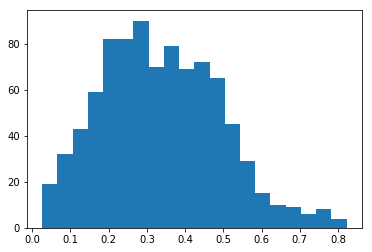

P: 0.602, R: 0.270, F1: 0.373
[5] Testing lr = 1.00e-04, l1_penalty = 1.00e-06, l2_penalty = 1.00e-04
[SparseLR] lr=0.0001 l1=1e-06 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.99s)	Avg. loss=0.690533	NNZ=122840
[SparseLR] Epoch 4 (2.63s)	Avg. loss=0.644600	NNZ=122840
[SparseLR] Training done (2.63s)
TEST MARGINALS:


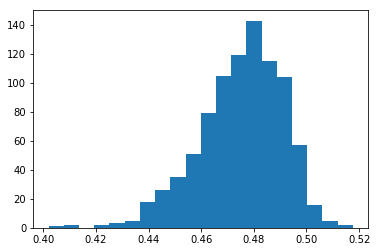

P: 0.481, R: 0.044, F1: 0.080
[6] Testing lr = 1.00e-03, l1_penalty = 1.00e-06, l2_penalty = 1.00e-05
[SparseLR] lr=0.001 l1=1e-06 l2=1e-05
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.69s)	Avg. loss=0.661053	NNZ=122840
[SparseLR] Epoch 4 (2.44s)	Avg. loss=0.433074	NNZ=122840
[SparseLR] Training done (2.44s)
TEST MARGINALS:


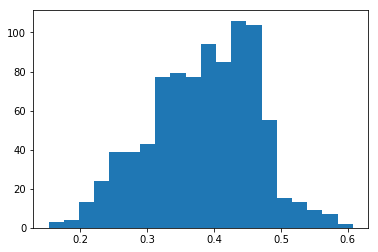

P: 0.650, R: 0.088, F1: 0.155
[7] Testing lr = 1.00e-02, l1_penalty = 1.00e-02, l2_penalty = 1.00e-04
[SparseLR] lr=0.01 l1=0.01 l2=0.0001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.67s)	Avg. loss=0.664603	NNZ=122840
[SparseLR] Epoch 4 (2.25s)	Avg. loss=0.321758	NNZ=122840
[SparseLR] Training done (2.25s)
TEST MARGINALS:


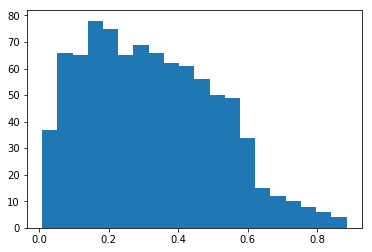

P: 0.593, R: 0.345, F1: 0.436
[8] Testing lr = 1.00e-01, l1_penalty = 1.00e-02, l2_penalty = 1.00e-02
[SparseLR] lr=0.1 l1=0.01 l2=0.01
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.70s)	Avg. loss=1.505253	NNZ=122840
[SparseLR] Epoch 4 (2.34s)	Avg. loss=0.640906	NNZ=122840
[SparseLR] Training done (2.34s)
TEST MARGINALS:


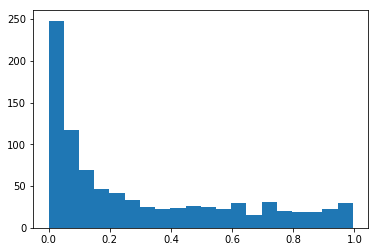

P: 0.568, R: 0.449, F1: 0.502
[SparseLR] Model saved. To load, use name
		SparseLR_8
[9] Testing lr = 1.00e-05, l1_penalty = 1.00e-05, l2_penalty = 1.00e-06
[SparseLR] lr=1e-05 l1=1e-05 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=1600  #epochs=5  batch size=100
[SparseLR] Epoch 0 (0.73s)	Avg. loss=0.692358	NNZ=122840
[SparseLR] Epoch 4 (2.46s)	Avg. loss=0.687150	NNZ=122840
[SparseLR] Training done (2.46s)
TEST MARGINALS:


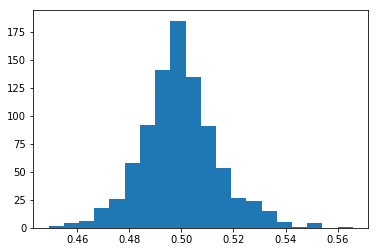

P: 0.339, R: 0.459, F1: 0.390
[SparseLR] Loaded model <SparseLR_8>
         lr  l1_penalty  l2_penalty     Prec.      Rec.        F1
8  0.100000    0.010000    0.010000  0.568376  0.449324  0.501887
3  0.000001    0.000001    0.000001  0.342424  0.763514  0.472803
0  0.000001    0.000100    0.000010  0.333901  0.662162  0.443941
7  0.010000    0.010000    0.000100  0.593023  0.344595  0.435897
9  0.000010    0.000010    0.000001  0.339152  0.459459  0.390244
4  0.010000    0.100000    0.000010  0.601504  0.270270  0.372960
1  0.000001    0.000010    0.000010  0.311429  0.368243  0.337461
2  0.001000    0.000100    0.000001  0.674419  0.097973  0.171091
6  0.001000    0.000001    0.000010  0.650000  0.087838  0.154762
5  0.000100    0.000001    0.000100  0.481481  0.043919  0.080495

Dev:
TEST MARGINALS:


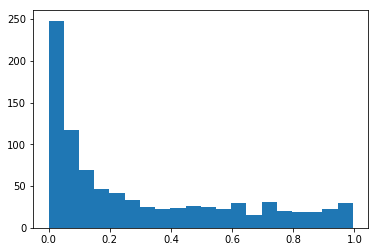

Scores (Un-adjusted)
Pos. class accuracy: 0.449
Neg. class accuracy: 0.829
Precision            0.568
Recall               0.449
F1                   0.502
----------------------------------------
TP: 133 | FP: 101 | TN: 491 | FN: 163


Calibration plot:


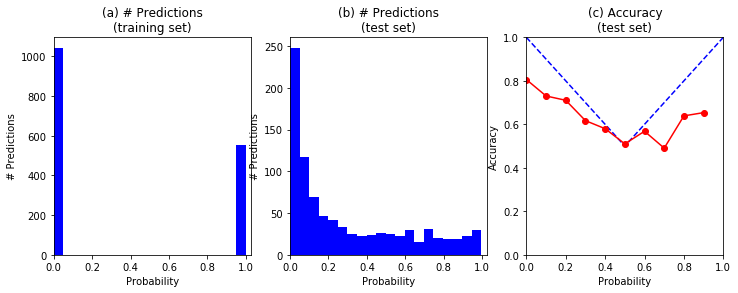


Test:
TEST MARGINALS:


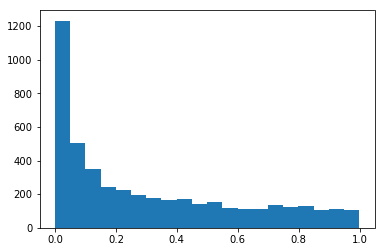

Scores (Un-adjusted)
Pos. class accuracy: 0.42
Neg. class accuracy: 0.814
Precision            0.522
Recall               0.42
F1                   0.466
----------------------------------------
TP: 632 | FP: 578 | TN: 2537 | FN: 873


Calibration plot:


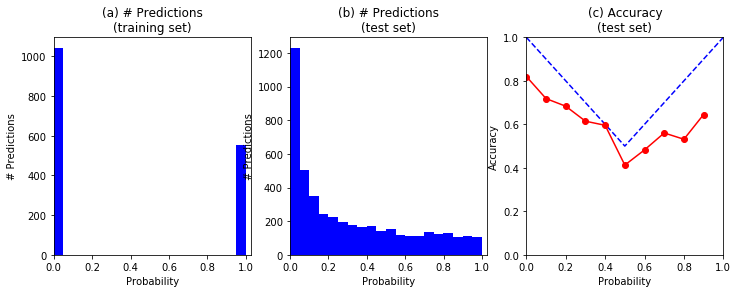

In [5]:
for TRADITIONAL in [50, 100, 200, 400, 800, 1600, 3200, 6400, 8272]:
    sm.traditional = TRADITIONAL
    sm.classify(model='logreg', search_n=SEARCH_N, n_epochs=N_EPOCHS,\
                lr=LR, l1_penalty=L1_PENALTY, l2_penalty=L2_PENALTY,\
                print_freq=PRINT_FREQ)